In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
tt=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\6-FeatureEngineering\featured_all.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\5-Churns\submission_with_churns.csv')

In [2]:
tt['date']=pd.to_datetime(tt['date'])

In [3]:
tt

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12
0,merchant_1,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,merchant_1,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2,merchant_1,NaN,2023-10-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,merchant_1,NaN,2023-11-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
4,merchant_1,NaN,2023-12-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369317,merchant_9993,3.0,2023-02-01,True,799,0,6,3.0,3.0,3.0,3.0,NaN,NaN
369318,merchant_9993,4.0,2023-06-01,True,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN
369319,merchant_9993,NaN,2023-10-01,False,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN
369320,merchant_9993,NaN,2023-11-01,False,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mean_payments = tt.groupby('merchant_id')['net_payment_count'].transform('mean')
tt['mean_payment_count'] = mean_payments

In [5]:
merchant_6450= tt.query("category==1")[['date','net_payment_count']]

In [6]:
merchant_6450=merchant_6450.set_index('date')

In [7]:
merchant_6450=merchant_6450.iloc[:-3]

<Axes: xlabel='date'>

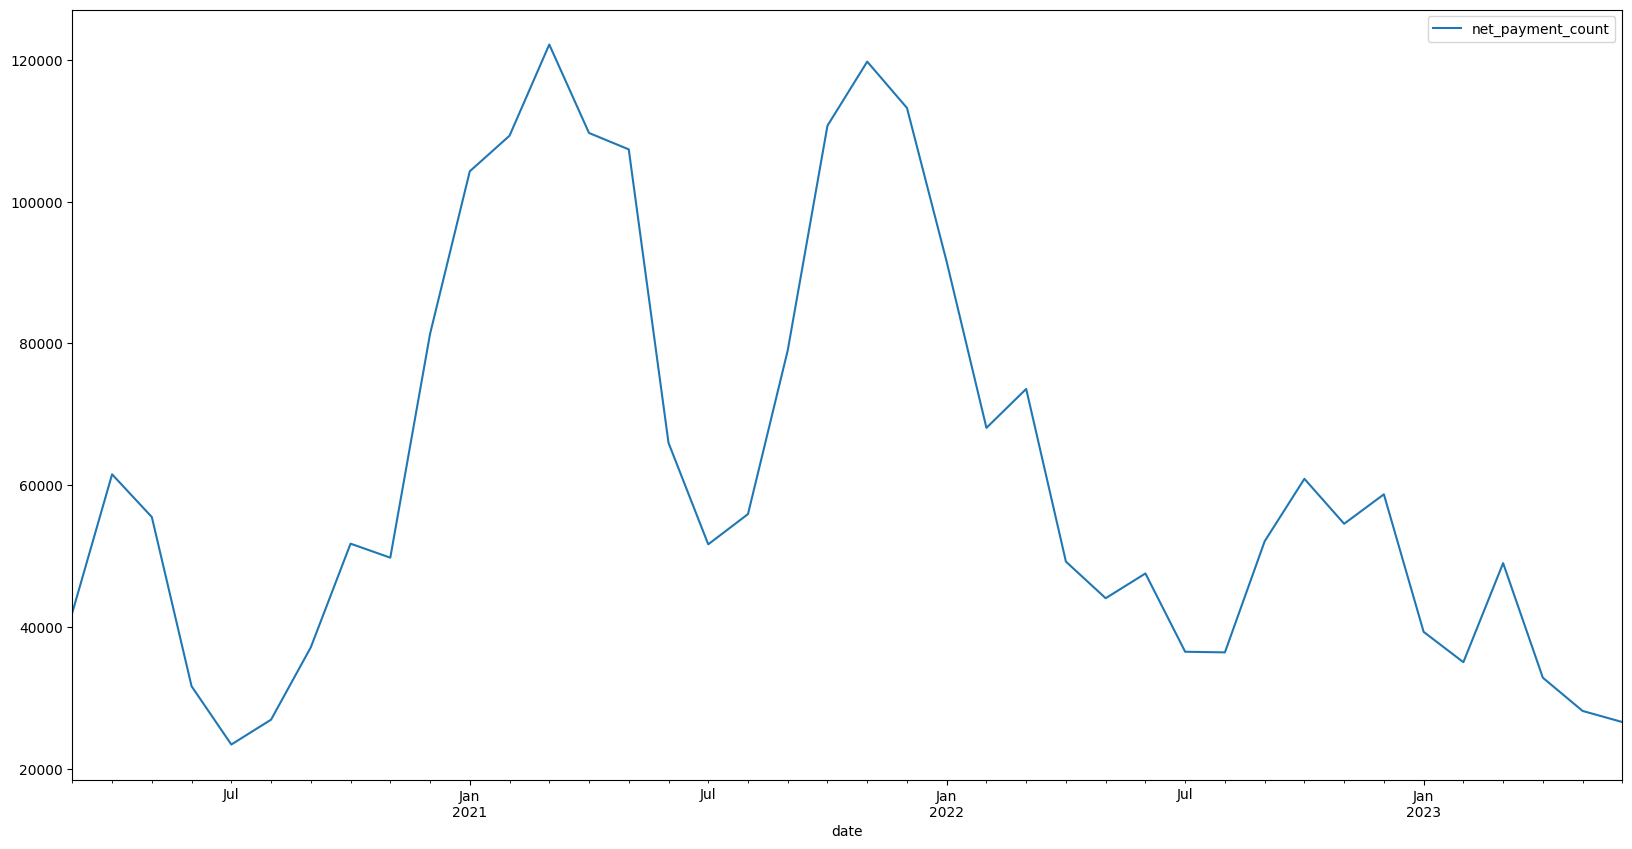

In [8]:
merchant_6450.iloc[:-3].plot(figsize=(20,10))

# Test

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
test_results=adfuller(merchant_6450['net_payment_count'])

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(merchant_6450['net_payment_count'])

ADF Test Statistic : -2.4744455917465586
p-value : 0.12181643030026246
#Lags Used : 1
Number of Observations Used : 41
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
merchant_6450['Sales First Difference'] = merchant_6450['net_payment_count'] -merchant_6450['net_payment_count'].shift(1)

In [14]:
merchant_6450['Seasonal First Difference'] = merchant_6450['net_payment_count'] -merchant_6450['net_payment_count'].shift(12)

In [15]:
merchant_6450

,net_payment_count,Sales First Difference,Seasonal First Difference
date,,,
2020-03-01,42024.0,NaN,NaN
2020-04-01,61517.0,19493.0,NaN
2020-05-01,55492.0,-6025.0,NaN
2020-06-01,31623.0,-23869.0,NaN
2020-07-01,23403.0,-8220.0,NaN
2020-08-01,26909.0,3506.0,NaN
2020-09-01,37116.0,10207.0,NaN
2020-10-01,51736.0,14620.0,NaN
2020-11-01,49758.0,-1978.0,NaN


In [16]:
adfuller_test(merchant_6450['Sales First Difference'].dropna())

ADF Test Statistic : -4.32699095709324
p-value : 0.0003987592483169668
#Lags Used : 3
Number of Observations Used : 38
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

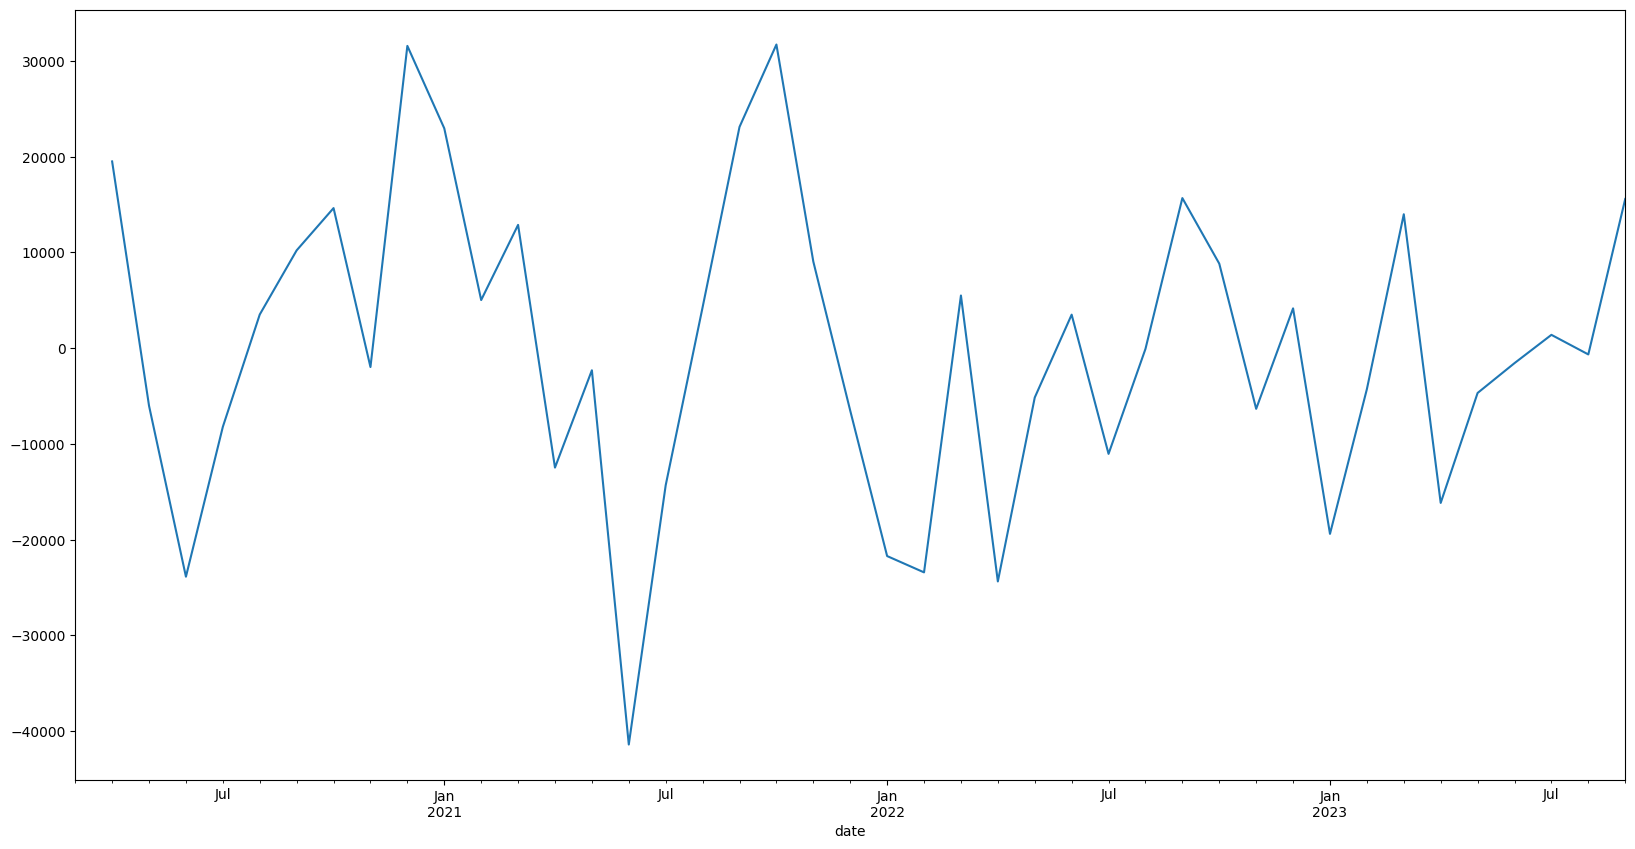

In [17]:
merchant_6450['Sales First Difference'].plot(figsize=(20,10))

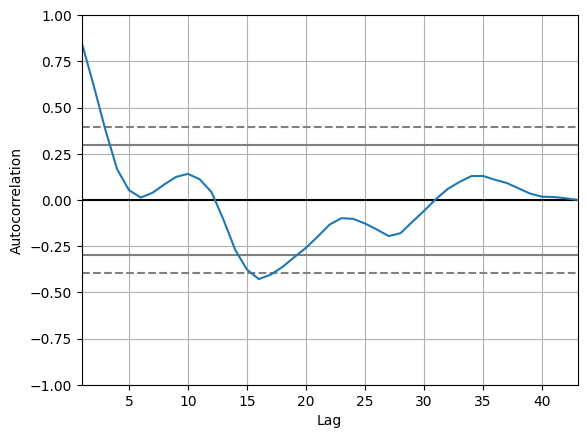

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(merchant_6450['net_payment_count'])
plt.show()

In [19]:
import statsmodels as sm

In [20]:
merchant_6450

,net_payment_count,Sales First Difference,Seasonal First Difference
date,,,
2020-03-01,42024.0,NaN,NaN
2020-04-01,61517.0,19493.0,NaN
2020-05-01,55492.0,-6025.0,NaN
2020-06-01,31623.0,-23869.0,NaN
2020-07-01,23403.0,-8220.0,NaN
2020-08-01,26909.0,3506.0,NaN
2020-09-01,37116.0,10207.0,NaN
2020-10-01,51736.0,14620.0,NaN
2020-11-01,49758.0,-1978.0,NaN


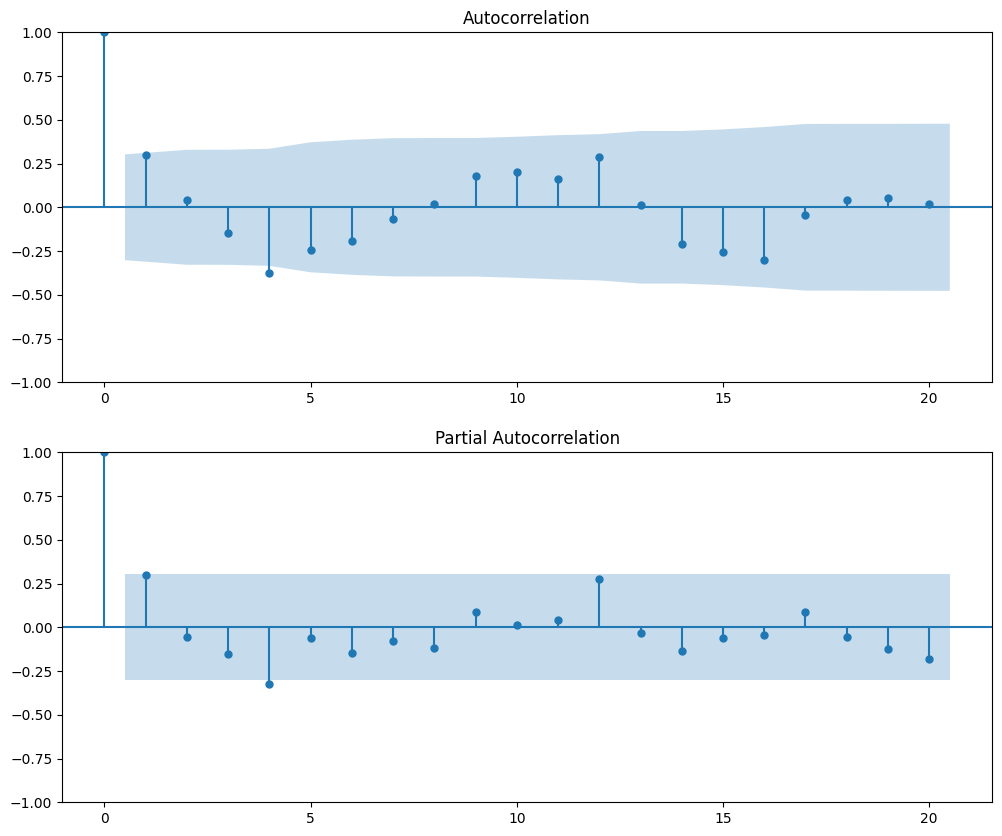

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(merchant_6450['Sales First Difference'].iloc[1:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(merchant_6450['Sales First Difference'].iloc[1:],lags=20,ax=ax2)

In [22]:
from statsmodels.tsa.arima.model import ARIMA 

In [23]:
model=ARIMA(merchant_6450['net_payment_count'],order=(1,1,1))
model_fit=model.fit()

c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      net_payment_count   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -462.064
Date:                Sun, 04 Feb 2024   AIC                            930.128
Time:                        15:13:49   BIC                            935.341
Sample:                    03-01-2020   HQIC                           932.039
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1980      0.536      0.369      0.712      -0.853       1.249
ma.L1          0.1547      0.503      0.307      0.758      -0.831       1.141
sigma2      2.163e+08   7.96e-09   2.72e+16      0.000    2.16e+08    2.16e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.91   Prob(JB):                         0.42
Heteroskedasticity (H):               0.69   Skew:                            -0.45
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.25e+31. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

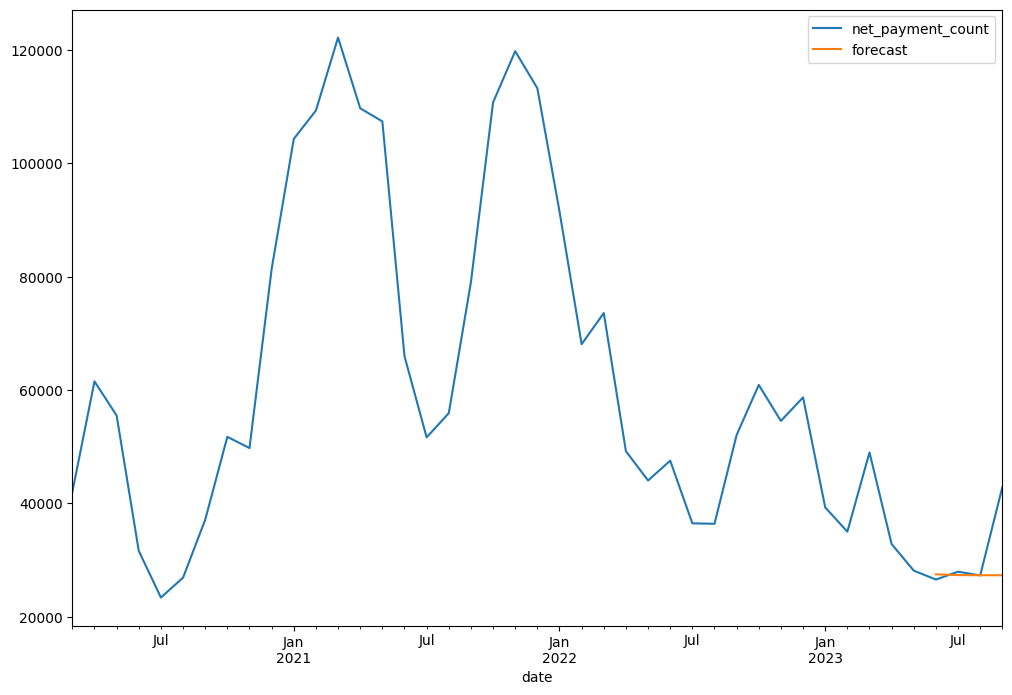

In [25]:
merchant_6450['forecast']=model_fit.predict(start=39,end=43,dynamic=True)
merchant_6450[['net_payment_count','forecast']].plot(figsize=(12,8))

In [26]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(merchant_6450['net_payment_count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='date'>

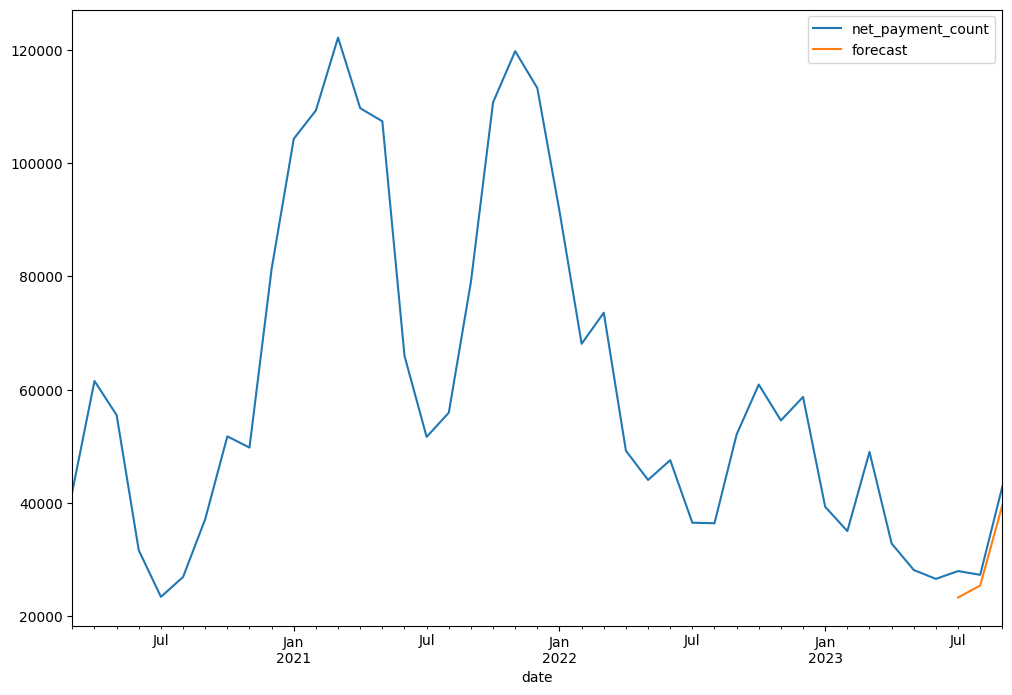

In [27]:
merchant_6450['forecast']=results.predict(start=40,end=42,dynamic=True)
merchant_6450[['net_payment_count','forecast']].plot(figsize=(12,8))

In [28]:
merchant_6450.index[-1]

Timestamp('2023-09-01 00:00:00')

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[merchant_6450.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [30]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=merchant_6450.columns)

In [31]:
future_dates_df.tail()

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN


In [32]:
future_df=pd.concat([merchant_6450,future_dates_df])

In [33]:
future_df

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2020-03-01,42024.0,NaN,NaN,NaN
2020-04-01,61517.0,19493.0,NaN,NaN
2020-05-01,55492.0,-6025.0,NaN,NaN
2020-06-01,31623.0,-23869.0,NaN,NaN
2020-07-01,23403.0,-8220.0,NaN,NaN
2020-08-01,26909.0,3506.0,NaN,NaN
2020-09-01,37116.0,10207.0,NaN,NaN
2020-10-01,51736.0,14620.0,NaN,NaN
2020-11-01,49758.0,-1978.0,NaN,NaN
2020-12-01,81315.0,31557.0,NaN,NaN


<Axes: >

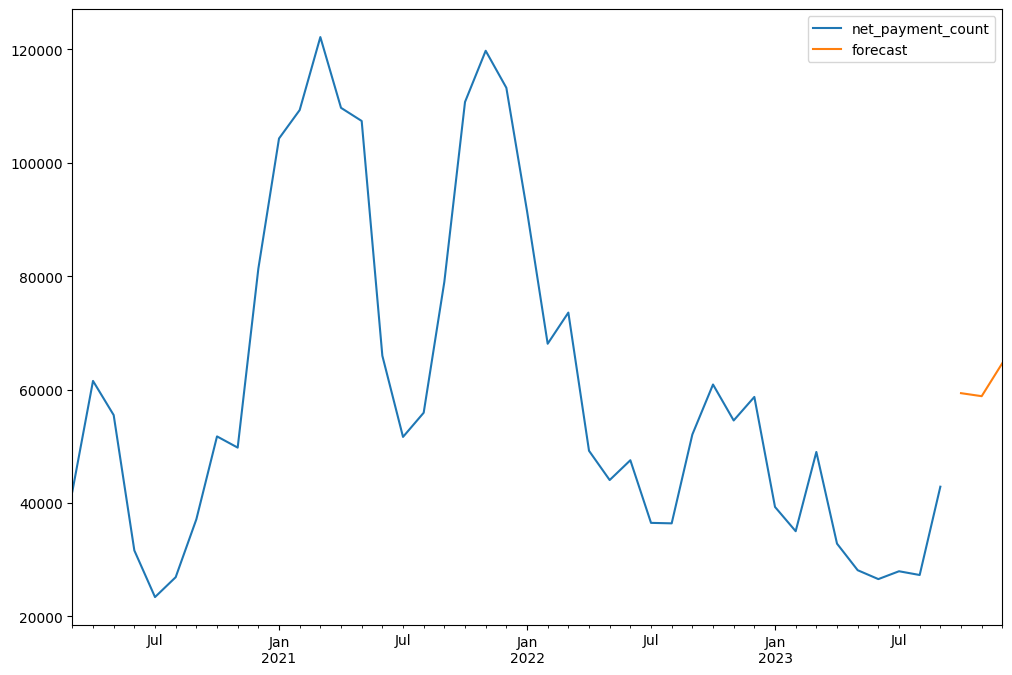

In [34]:
future_df['forecast'] = results.predict(start = 43, end = 45, dynamic= True)  
future_df[['net_payment_count', 'forecast']].plot(figsize=(12, 8)) 

In [35]:
future_df

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2020-03-01,42024.0,NaN,NaN,NaN
2020-04-01,61517.0,19493.0,NaN,NaN
2020-05-01,55492.0,-6025.0,NaN,NaN
2020-06-01,31623.0,-23869.0,NaN,NaN
2020-07-01,23403.0,-8220.0,NaN,NaN
2020-08-01,26909.0,3506.0,NaN,NaN
2020-09-01,37116.0,10207.0,NaN,NaN
2020-10-01,51736.0,14620.0,NaN,NaN
2020-11-01,49758.0,-1978.0,NaN,NaN
2020-12-01,81315.0,31557.0,NaN,NaN


In [36]:
merchant_6450

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
date,,,,
2020-03-01,42024.0,NaN,NaN,NaN
2020-04-01,61517.0,19493.0,NaN,NaN
2020-05-01,55492.0,-6025.0,NaN,NaN
2020-06-01,31623.0,-23869.0,NaN,NaN
2020-07-01,23403.0,-8220.0,NaN,NaN
2020-08-01,26909.0,3506.0,NaN,NaN
2020-09-01,37116.0,10207.0,NaN,NaN
2020-10-01,51736.0,14620.0,NaN,NaN
2020-11-01,49758.0,-1978.0,NaN,NaN


In [37]:
submission=submission.sort_values(['merchant_id','month_id']).reset_index(drop=True)

In [38]:
future_df['forecast'].iloc[-3:].values

array([59358.33769189, 58828.01686393, 64655.89978856])

In [39]:
# Assuming 'submission' is your original DataFrame
merchant_filter = submission['merchant_id'] == 'merchant_6450'
forecast_values = future_df['forecast'].iloc[-3:].values

# Check if the lengths match
if sum(merchant_filter) == len(forecast_values):
    submission.loc[merchant_filter, 'net_payment_count'] = forecast_values
else:
    print("Length mismatch: cannot assign values")


In [40]:
merchant_filter.sum()

3

In [41]:
submission.query("merchant_id=='merchant_6450'")

,id,merchant_id,month_id,net_payment_count
69777,202310merchant_6450,merchant_6450,2023-10-01,59358.337692
69778,202311merchant_6450,merchant_6450,2023-11-01,58828.016864
69779,202312merchant_6450,merchant_6450,2023-12-01,64655.899789


In [43]:
submission.to_csv('submission_sarima_c1.csv',index=False)